In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load the CSV files
data_40_30 = pd.read_csv('40_30.csv')
data_40_30

,Num_cores,Time_taken
0,0,75.335351
1,2,60.451715
2,4,60.434252
3,8,59.874555


In [6]:
data_60_30 = pd.read_csv('60_30.csv')
data_60_30

,Num_cores,Time_taken
0,0,114.016418
1,2,88.542650
2,4,84.422920
3,8,83.666780


In [7]:
data_60_60 = pd.read_csv('60_60.csv')
data_60_60

,Num_cores,Time_taken
0,0,239.992570
1,2,195.855246
2,4,185.965928
3,8,184.587511


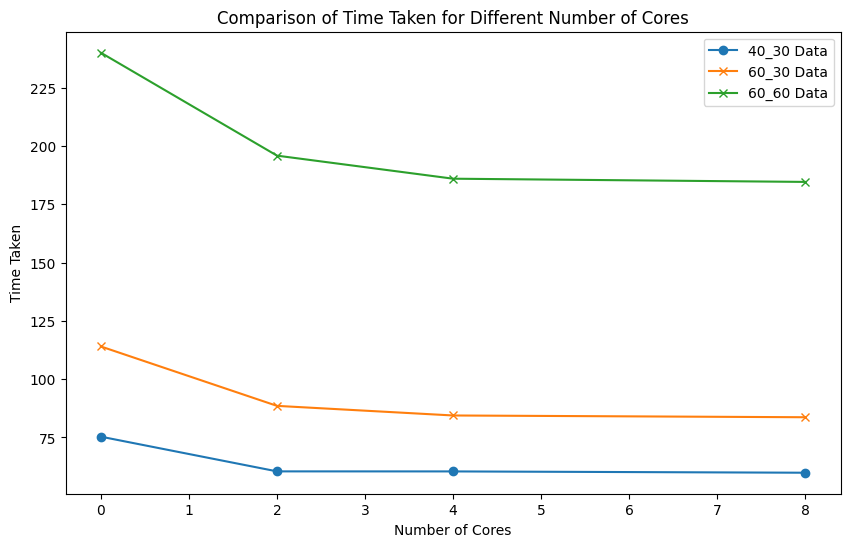

In [8]:
# Accounting for leading space
corrected_column_name = ' Time_taken'

# Plotting the data from both CSV files on the same graph
plt.figure(figsize=(10, 6))

# Plot for the first dataset (40_30 (population_generation))
plt.plot(data_40_30['Num_cores'], data_40_30[corrected_column_name], label='40_30 Data', marker='o')

# Plot for the second dataset (60_30)
plt.plot(data_60_30['Num_cores'], data_60_30[corrected_column_name], label='60_30 Data', marker='x')

# Plot for the third dataset (60_60)
plt.plot(data_60_60['Num_cores'], data_60_60[corrected_column_name], label='60_60 Data', marker='x')

# Adding titles and labels
plt.title('Comparison of Time Taken for Different Number of Cores')
plt.xlabel('Number of Cores')
plt.ylabel('Time Taken')
plt.legend()

# Analysis and Explanation

Ok, lets go through the important parts of this data. Essentially, each line represents a population-generation combination, run on the credit card fraud dataset. The 0 cores option is equivalent to serial, and the rest are the cores in parallel. (You can run any zero core version by going into `credit_serial.py` and setting the population and generation configuration in line 129. (First number is population number, second is number of generations).) The combinations on here are 40-30, 60-30 and 60-60, all of which increase in running time as you increase the population number and generation number (which makes sense, more data per core would increase the overall running time). Additionally, we see a rate of diminishing returns as we increase the number of cores. The biggest fall in running time occurs when switching from serial to parallel. After that, the rate does decrease, but in diminishing manner (if you look at the raw pandas data, there's barely a 1 second fall from 4 cores to 8 cores). (This also makes sense, after parallelizing, the cost of porting over the data to a new core, opening a new pool member set, and running the GA and recombining could offset the additional speed up gain from the core). 

# Applicability to our product
## Important: